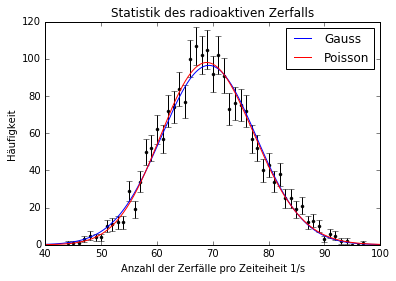

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#Die Messdaten werden in Python importiert
anzahl, haeufigkeit=np.loadtxt('C:/Users/admin/Desktop/Neuer Ordner/maxundilja.dat', unpack=True, skiprows=0, ndmin=2)
fehler=np.sqrt(haeufigkeit)
#Die Messdaten werden geplottet
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", color="black")
from numpy import exp, pi, sqrt
#Die Gaußfunktion wird an die Messdaten angefittet und geplottet
def gaussian(x,A,mu,sig): #A: Fläche der Gaussfuktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)
popt, pcov=curve_fit(gaussian,anzahl[7:-5], haeufigkeit[7:-5], p0=[2000,75,8], sigma=fehler[7:-5])
x=np.linspace(40,100,500)
plt.plot(x,gaussian(x,*popt), label='Gauss')
#Die Poissonfunktion wird an die Messdate angefittet und geplottet
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p=curve_fit(poisson, anzahl[7:-5], haeufigkeit[7:-5], p0=[2000,75], sigma=fehler[7:-5])
plt.xlabel('Anzahl der Zerfälle pro Zeiteiheit 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.plot(x, poisson(x, *popt_p), label='Poisson', color='r')
plt.legend()


In [45]:
#Fitparameter werden zusammen mit den aus der beim fitten erhaltener Kovariazmatrix ausgerechneten Standardfehler angegeben 
print("Gaussfit:")
print("A=",popt[0], ", Stadartfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Stadartfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Stadartfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Stadartfehler=", np.sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Stadartfehler=", np.sqrt(pcov_p[1][1]))


Gaussfit:
A= 2046.78763472 , Stadartfehler= 46.0067155901
mu= 69.3004169182 , Stadartfehler= 0.200048057456
sig= 8.46423225508 , Stadartfehler= 0.168646304999
Poissonfit:
A_p= 2045.82795751 , Stadartfehler= 41.7812292139
mu_p= 69.4161314801 , Stadartfehler= 0.179755444039


In [54]:
#Hier werden Chi^2 Summen und reduzierte Chi^2 Summen ausgerechnet 
#Gauss:
chi2_g=np.sum((gaussian(anzahl[7:-5], *popt)-haeufigkeit[7:-5])**2/fehler[7:-5])
dof_g=len(anzahl[7:-5])-3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g",chi2_red_g)
#Poisson
chi2_p=np.sum((poisson(anzahl[7:-5], *popt_p)-haeufigkeit[7:-5])**2/fehler[7:-5])
dof_p=len(anzahl[7:-5])-3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p",chi2_red_p)



chi2_g= 233.558851304
chi2_red_g 5.98868849497
chi2_p= 198.389952553
chi2_red_p 5.08692186034


In [52]:
#Hier wird die "Fitwahrscheinlichkeit" ausgerechnet
from scipy.stats import chi2
#Gauss
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit poisson=", prob_p,"%")

Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit poisson= 0.0 %
